### Titanic: Machine Learning from Disaster

* [Chapter 1]데이터 분석
    * [Section 1.1데이터 훑어기기]
    * [Section 1.2 막대그래프로 데이터 분석]
        * [Section 1.2.1 성별차이]
        * [Section 1.2.2등급 분석]
        * [Section 1.2.3 형제 자매]
         * [Section 1.2.4 부모&아이들 수 연관성]
         * [Section 1.2.5 선착장]
* [Chapter 2]이름으로 결혼여부 분리한 후 성별로 생존여부 데이터 분석
    * [section 2.1 결혼여부와 성별 숫자변환]
    * [Section 2.2 선착장]
* [Chapter 3]머신러닝

### 1.데이터 분석 <a class="anchor" id="chapter1"></a>

#### 1.1 데이터 훑어보기 <a class="anchor" id="section_1_1"></a>

#### 1.2 막대그래프로 데이터 분석 <a class="anchor" id="section_1_2"></a>

##### 1.2.1 성별 차이 <a class="anchor" id="section_1_2_1"></a>

##### 1.2.2 등급분석 <a class="anchor" id="section_1_2_2"></a>

##### 1.2.3형제자매 <a class="anchor" id="section_1_2_3"></a>

##### 1.2.4 부모&아이들 수 연관성 <a class="anchor" id="section_1_2_4"></a>

##### 1.2.5 선착장 <a class="anchor" id="section_1_2_5"></a>

#### 1.0 데이터 불러오기 <a class="anchor" id="section_1_0"></a>

In [2]:
import pandas as pd

train = pd.read_csv("data/train.csv") 
test = pd.read_csv("data/test.csv") 

#### 1.1데이터 훑어보기 <a class="anchor" id="section_1_1"></a>

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
train.shape

(891, 12)

In [28]:
test.shape

(418, 11)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [36]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### 1.2 막대그래프로 데이터 분석 <a class="anchor" id="section_1_2"></a>

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()

In [74]:
def bar_chart(feature):
    survived = train[train["Survived"]==1][feature].value_counts()
    dead = train[train["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ["Survived","Dead"]
    df.plot(kind="bar", stacked=True, figsize=(10,5))

 * [1.2.1 성별 차이](#section_1_2_1)

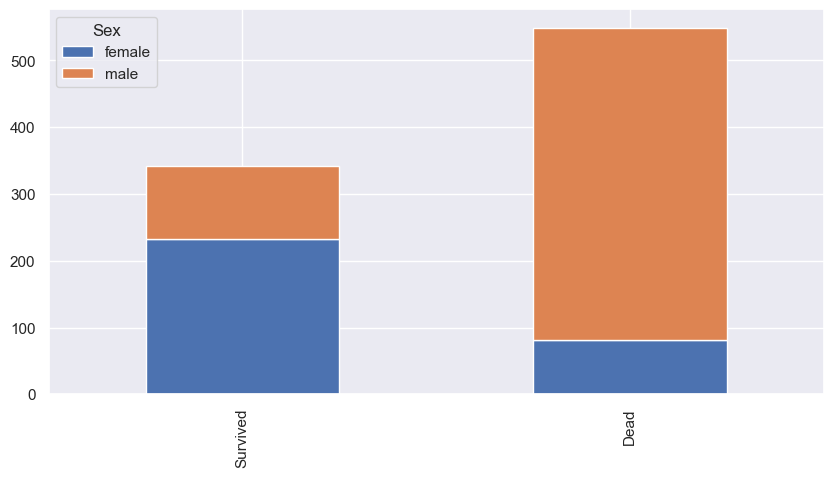

In [78]:
bar_chart("Sex") #남자가 여자보다 더 많이 죽음

 * [1.2.2 등급분석](#section_1_2_2)

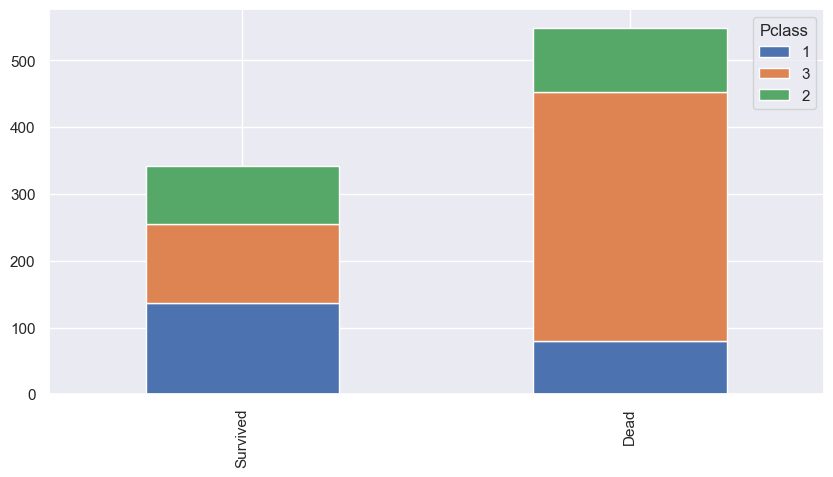

In [80]:
bar_chart("Pclass") 

* [1.2.3형제자매](#section_1_2_3)

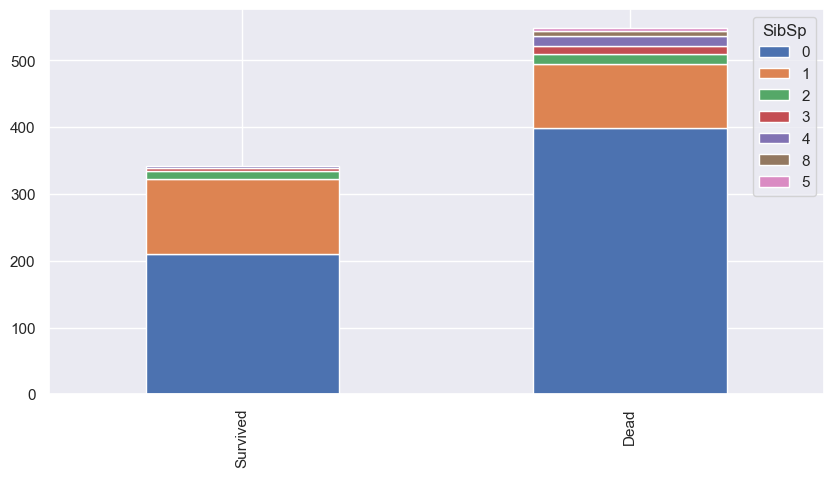

In [86]:
bar_chart("SibSp") 

* [1.2.4 부모&아이들 수 연관성](#section_1_2_4)

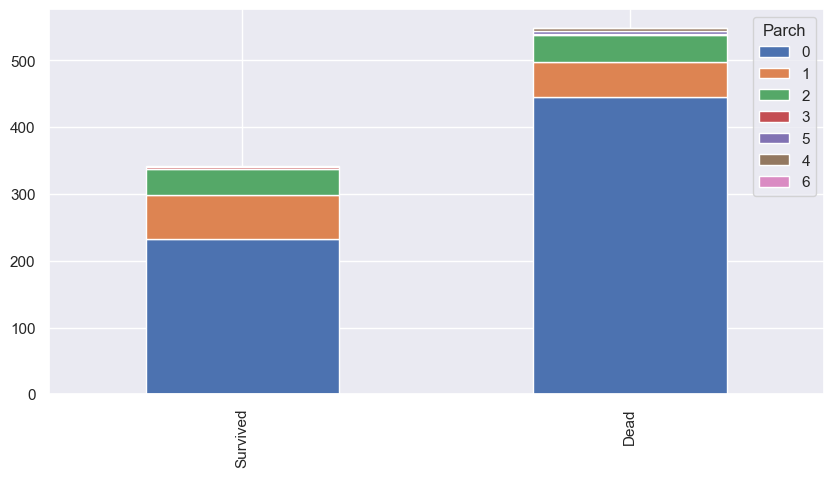

In [90]:
bar_chart("Parch")

* [1.2.5 선착장](#section_1_2_5)

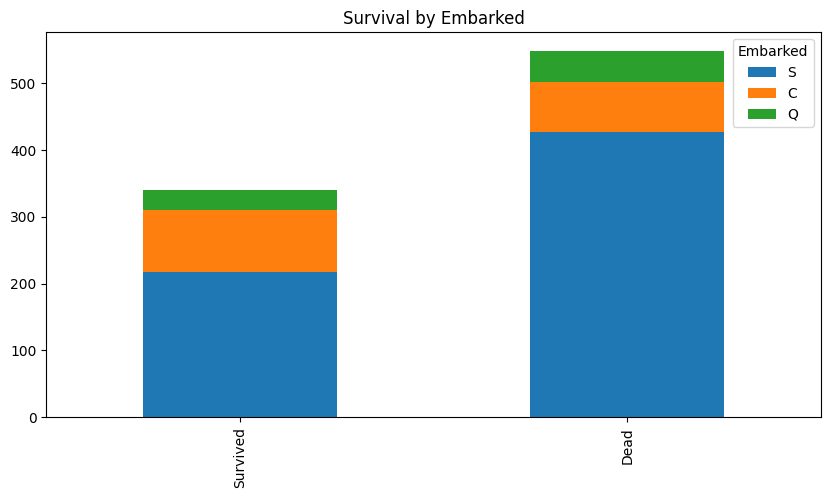

In [38]:
bar_chart("Embarked") 

### 2. 이름으로 결혼여부 분리한 후 성별로 생존여부 데이터 분석<a class="anchor" id="chapter2"></a>
##### Section 2.1 결혼여부와 성별 숫자 변환 <a class="anchor" id="section_2_1"></a>
##### Section 2.2 시각화 <a class="anchor" id="section_2_2"></a>

In [7]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset["Title"]  = dataset["Name"].str.extract(" ([A-Za-z]+)\\.", expand=False)

In [8]:
train["Title"].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [9]:
test["Title"].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

* [2.1 결혼여부와 성별 숫자변환](#section_2_1)

In [10]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                 "Master":3, "Dr":3, "Rev":3, "col":3, "Major":3, "Mlle":3, "Countess":3,
                 "Ms":3, "Lady":3, "Jonkheer":3, "Don":3, "Mme":3, "Capt":3, "Sir": 3}
for dataset in train_test_data:
    dataset["Title"] = dataset["Title"].map(title_mapping)

In [12]:
train. head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [13]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


* [2.2 시각화](#section_2_2)

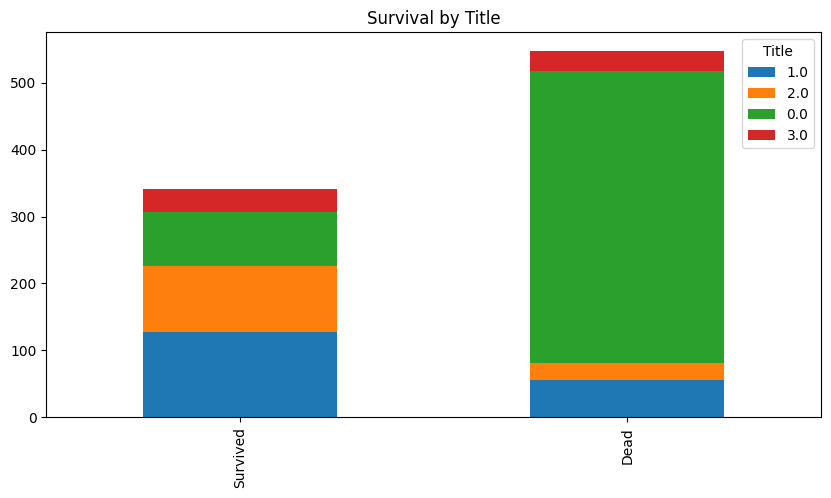

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.title(f"Survival by {feature}")
    plt.show()

bar_chart("Title")  ##0= Mr 1= Miss 2=Mrs

### 3. 머신러닝<a class="anchor" id="chapter1"></a>

Accuracy: 0.80
Confusion Matrix:
 [[89 16]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



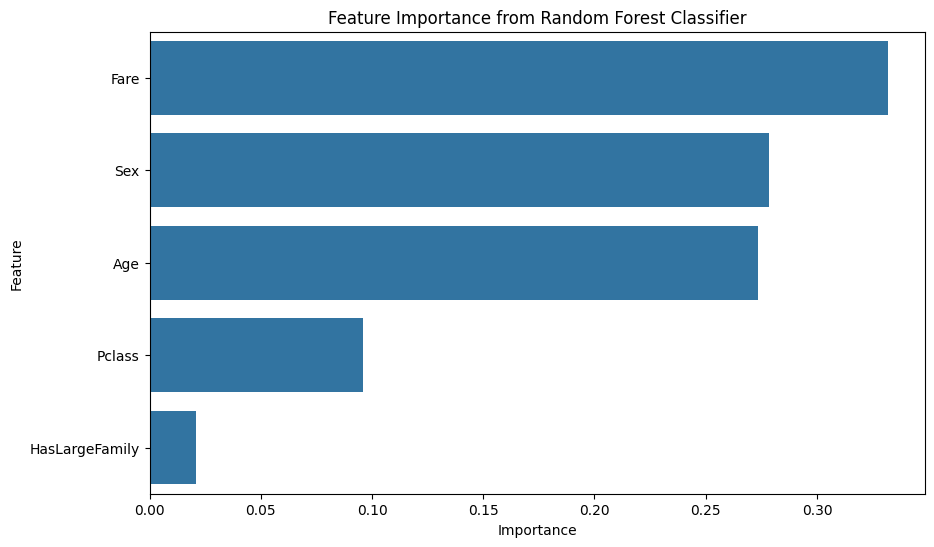

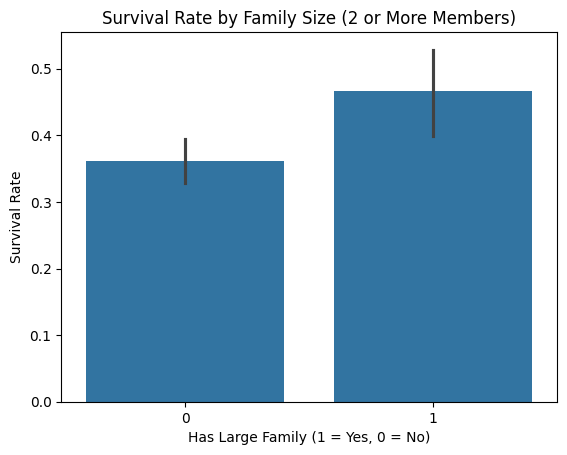

In [40]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/train.csv')

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  

df['HasLargeFamily'] = np.where(df['FamilySize'] >= 3, 1, 0)

features = ['Pclass', 'Sex', 'Age', 'Fare', 'HasLargeFamily']
df = df[features + ['Survived']]

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Classifier')
plt.show()

sns.barplot(x='HasLargeFamily', y='Survived', data=df)
plt.title('Survival Rate by Family Size (2 or More Members)')
plt.xlabel('Has Large Family (1 = Yes, 0 = No)')
plt.ylabel('Survival Rate')
plt.show()